<a href="https://colab.research.google.com/github/shahzaibabbasi112/ML_Portfolio_Project/blob/main/ML_portfolio_project_Shahzaib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [3]:
import warnings

warnings.filterwarnings('ignore')

# Import Dataset

In [15]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/CHD/CHD.csv")

In [16]:
# Display the first few rows
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


###### Source: The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.

Demographic:
""" • Sex: male or female(Nominal)
• Age: Age of the patient;
• Current Smoker: whether or not the patient is a current smoker (Nominal)
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
• • Sys BP: systolic blood pressure (Continuous)
• Dia BP: diastolic blood pressure (Continuous)
• BMI: Body Mass Index (Continuous)
• Heart Rate: heart rate (Continuous)
• Glucose: glucose level (Continuous)
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No” """

# Exploratory Data Analysis

In [17]:
df.rename(columns={'male': 'sex'}, inplace=True) # to correct the name of column

In [18]:
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [19]:
# Understand the basic statistics
df.describe()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [21]:
# describe the presence of null values in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [23]:
# Check for any missing values
df.isnull().sum()

,0
sex,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [24]:
# Example: Fill missing values with the mean for numeric columns
df.fillna(df.mean(), inplace=True)

In [25]:
# Check for any missing values
df.isnull().sum()

,0
sex,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


#### visualize the relationship between education level and the presence of CHD using a bar chart or count plot

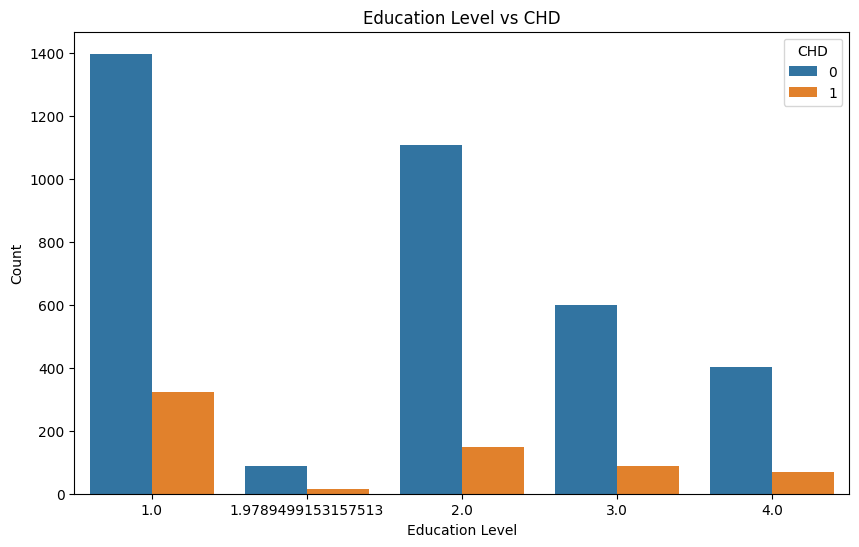

In [65]:
# Plot the relationship
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='TenYearCHD', data=df)
plt.title('Education Level vs CHD')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='CHD')
plt.show()

#### as education data have no such relation to CHD so we can drop it

In [66]:
df = df.drop('education', axis=1)

In [67]:
print(df.head())

   sex  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0    1   39              0         0.0     0.0                0             0   
1    0   46              0         0.0     0.0                0             0   
2    1   48              1        20.0     0.0                0             0   
3    0   61              1        30.0     0.0                0             1   
4    0   46              1        23.0     0.0                0             0   

   diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  TenYearCHD  
0         0    195.0  106.0   70.0  26.97       80.0     77.0           0  
1         0    250.0  121.0   81.0  28.73       95.0     76.0           0  
2         0    245.0  127.5   80.0  25.34       75.0     70.0           0  
3         0    225.0  150.0   95.0  28.58       65.0    103.0           1  
4         0    285.0  130.0   84.0  23.10       85.0     85.0           0  


### Standardize the Data

In [68]:
from sklearn.preprocessing import StandardScaler

# Assuming the features are in all columns except the target
X = df.drop('TenYearCHD', axis=1)
Y = df['TenYearCHD']

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [69]:
first_few_rows = X[:5]  # This will give you the first 5 rows. To check that data is normalized.
print(first_few_rows)

[[ 1.1531919  -1.23495068 -0.98827076 -0.75797428 -0.17584381 -0.07703255
  -0.67110093 -0.16247659 -0.94134554 -1.19590711 -1.08262515  0.28694273
   0.34274444 -0.21751656]
 [-0.86715836 -0.41825733 -0.98827076 -0.75797428 -0.17584381 -0.07703255
  -0.67110093 -0.16247659  0.29959495 -0.51518725 -0.15898843  0.71932499
   1.59027451 -0.26131108]
 [ 1.1531919  -0.18491638  1.01186844  0.92583516 -0.17584381 -0.07703255
  -0.67110093 -0.16247659  0.18678218 -0.22020864 -0.24295541 -0.11350221
  -0.07309892 -0.52407818]
 [-0.86715836  1.33179984  1.01186844  1.76773988 -0.17584381 -0.07703255
   1.49008884 -0.16247659 -0.26446891  0.80087114  1.0165492   0.68247423
  -0.90478564  0.92114088]
 [-0.86715836 -0.41825733  1.01186844  1.17840658 -0.17584381 -0.07703255
  -0.67110093 -0.16247659  1.08928436 -0.10675533  0.09291249 -0.66380691
   0.75858779  0.13283958]]


# Model Building

### Split the data into training and testing sets.

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Choose and Train a Model

In [71]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

### Evaluate the Model

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}")

Accuracy: 0.8549528301886793, Precision: 0.5294117647058824, Recall: 0.07258064516129033


In [78]:
def make_prediction(input_data):
    # Create a DataFrame with the input data
    input_df = pd.DataFrame([input_data])

    # Predict
    prediction = model.predict(input_df)
    if prediction[0] == 1:
        return "Patient has Chronic Heart Disease(CHD)"
    else:
        return "Patient does not have Chronic Heart Disease(CHD)"

# input data as a dictionary
input_data = {
    'sex': 0,
    'age': 39,
    'currentSmoker': 1,
    'cigsPerDay': 40,
    'BPMeds': 0,
    'prevalentStroke': 0,
    'prevalentHyp': 0,
    'diabetes': 0,
    'totChol': 250,
    'sysBP': 160,
    'diaBP': 110,
    'BMI': 26,
    'heartRate': 80,
    'glucose': 77}

# Call the function and print the result
result = make_prediction(input_data)
print("Prediction:", result)


Prediction: Patient has Chronic Heart Disease(CHD)
